<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/ABSA/textsent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data upload

In [1]:
pip install datasets

In [2]:
from datasets import load_dataset

ds = load_dataset("jordiclive/FABSA")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
print(ds)


DatasetDict({
    train: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 7930
    })
    validation: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1057
    })
    test: Dataset({
        features: ['id', 'org_index', 'data_source', 'industry', 'text', 'labels', 'label_codes'],
        num_rows: 1587
    })
})


In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(ds['train'])

In [5]:
df.head()

,id,org_index,data_source,industry,text,labels,label_codes
0,301972057,600,Trustpilot,Price Comparison,My experience is only around the Parking forum...,"[[Staff support: Attitude of staff, negative],...","['staff-support.attitude-of-staff.-1', 'compan..."
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
3,301979991,727,Apple Store,Fashion,This is the worst app I ordered my sneakers 2/...,"[[Logistics rides: Speed, negative], [Online e...","['logistics-rides.speed.-1', 'online-experienc..."
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']


In [6]:
df.shape

(7930, 7)

In [7]:
df['data_source'].value_counts()

,count
data_source,
Google Play,4612
Apple Store,1870
Trustpilot,1448


In [8]:
df['industry'].value_counts()

,count
industry,
Fashion,2161
Price Comparison,1157
Groceries,1021
Trading,1021
Travel Booking,973
Banking,913
Ride Hailing,383
Information Technology,141
Consulting,81


In [9]:
dff = df[df['data_source']=='Google Play']

In [10]:
dff.head(5)

,id,org_index,data_source,industry,text,labels,label_codes
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp..."
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1']
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']
7,301984266,549,Google Play,Travel Booking,"Very useful, especially when you want to try n...","[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1']
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","[[Staff support: Attitude of staff, positive],...","['staff-support.attitude-of-staff.1', 'purchas..."


In [11]:
dff.shape

(4612, 7)

1. Data cleaning
2. Lemmatization
3. Word2vec or TF-IDF

born vs. SVM, Logreg

Preprocessing

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# from spellchecker import SpellChecker

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
# spell = SpellChecker()
stop_words = set(stopwords.words('english'))

def clean(text):
    """
    removing URLs, HTML tags, special characters, and digits.
    """
    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

def normalize(text):
    """
    converting text to lowercase.
    """
    return text.lower()

# def spelling(text):
#     """
#     fix typos, missplellings.
#     """
#     corrected_text = []
#     for word in text.split():
#         correction = spell.correction(word)
#         if correction is None:
#             corrected_text.append(word)  # Use the original word if no correction is found
#         else:
#             corrected_text.append(correction)  # Use the corrected word
#     return ' '.join(corrected_text)

def lemmatize(text):
    """
    lemmatize w/NLTK WordNetLemmatizer.
    """
    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize each word and remove stop words
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

    return lemmatized_text

def preprocess(text):
    """
    perform all.
    """
    text = clean(text)
    # text = spelling(text)
    text = normalize(text)
    text = lemmatize(text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Spelling corrections have distorted some words' meaning.

In [13]:
dff.loc[:, 'clean'] = dff['text'].apply(preprocess)



<ipython-input-13-06d88defc487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.loc[:, 'clean'] = dff['text'].apply(preprocess)


In [14]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp...",love handy plus hate bank take away alot business
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1'],sometimes take
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],easy load info
7,301984266,549,Google Play,Travel Booking,"Very useful, especially when you want to try n...","[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],useful especially want try new location want u...
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","[[Staff support: Attitude of staff, positive],...","['staff-support.attitude-of-staff.1', 'purchas...",great service easy return friendly people


<ipython-input-15-d9b5b488d677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["tokens"] = dff["clean"].apply(lambda x: len(x.split()))


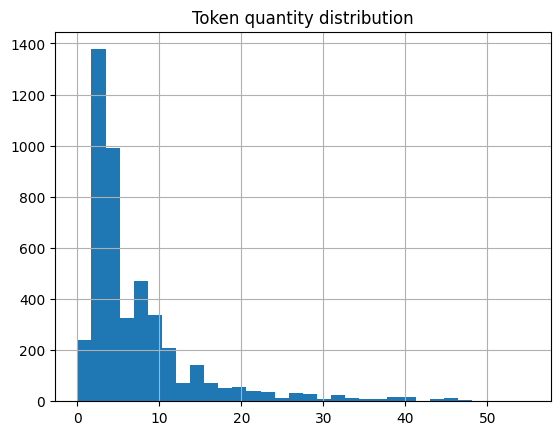

In [15]:
from matplotlib import pyplot as plt
dff["tokens"] = dff["clean"].apply(lambda x: len(x.split()))
dff["tokens"].hist(bins=32)
plt.title("Token quantity distribution");

In [16]:
# from nltk.tokenize import word_tokenize
# def word_tokenizer(text):
#     return word_tokenize(text) if isinstance(text, str) else []

# dff['clean2'] = dff['clean'].apply(word_tokenizer)

In [17]:
def clean_label_codes(label_codes_series):
    unique_codes = set()

    for label_codes in label_codes_series:
        if isinstance(label_codes, str):  # Ensure we have a string
            # Remove extraneous quotes and brackets
            label_codes = label_codes.replace("'", "").replace("[", "").replace("]", "").strip()
            # Split the string by comma to get individual codes
            codes = label_codes.split(',')
            for code in codes:
                code = code.strip()  # Remove any extra whitespace
                parts = code.rsplit('.', 1)
                if len(parts) == 2:
                    clean_code = parts[0]  # Get the part before the sentiment value
                    unique_codes.add(clean_code)
                else:
                    print(f"Unexpected format: {code}")
        else:
            print(f"Unexpected data type: {label_codes}")

    return unique_codes

# Apply the function to your DataFrame
unique_labels = clean_label_codes(dff['label_codes'])

# Convert the set to a list and print
unique_labels_list = list(unique_labels)
print(unique_labels_list)
len(unique_labels_list)

['staff-support.attitude-of-staff', 'value.discounts-promotions', 'value.price-value-for-money', 'company-brand.reviews', 'staff-support.email', 'purchase-booking-experience.ease-of-use', 'company-brand.general-satisfaction', 'logistics-rides.speed', 'company-brand.competitor', 'online-experience.app-website', 'staff-support.phone', 'account-management.account-access']


12

In [18]:
dff.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...","['company-brand.general-satisfaction.1', 'comp...",love handy plus hate bank take away alot business,9
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",['company-brand.general-satisfaction.-1'],sometimes take,2
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],easy load info,3
7,301984266,549,Google Play,Travel Booking,"Very useful, especially when you want to try n...","[[Company brand: General satisfaction, positive]]",['company-brand.general-satisfaction.1'],useful especially want try new location want u...,16
8,301988812,727,Google Play,Fashion,"Great service, easy returns, friendly people.","[[Staff support: Attitude of staff, positive],...","['staff-support.attitude-of-staff.1', 'purchas...",great service easy return friendly people,6


In [19]:
import ast
dff['label_codes'] = dff['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Explode 'label_codes' into separate rows
exploded_df = dff.explode('label_codes')


<ipython-input-19-eecf180726d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['label_codes'] = dff['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [21]:
def split_label_sentiment(label_code):
    if '-' in label_code or '.' in label_code:
        label, sentiment = label_code.rsplit('.', 1)  # Split at last '.'
        return label, sentiment
    return label_code, None

# Apply split function to separate labels and sentiments
exploded_df[['label', 'sentiment']] = exploded_df['label_codes'].apply(lambda x: pd.Series(split_label_sentiment(x)))

In [22]:
exploded_df.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,tokens,label,sentiment
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...",company-brand.general-satisfaction.1,love handy plus hate bank take away alot business,9,company-brand.general-satisfaction,1
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...",company-brand.competitor.1,love handy plus hate bank take away alot business,9,company-brand.competitor,1
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",company-brand.general-satisfaction.-1,sometimes take,2,company-brand.general-satisfaction,-1
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",company-brand.general-satisfaction.1,easy load info,3,company-brand.general-satisfaction,1
7,301984266,549,Google Play,Travel Booking,"Very useful, especially when you want to try n...","[[Company brand: General satisfaction, positive]]",company-brand.general-satisfaction.1,useful especially want try new location want u...,16,company-brand.general-satisfaction,1


In [41]:
exploded_df['sentiment'].value_counts()

,count
sentiment,
1,4852
-1,2112
0,399


In [23]:
!python -m spacy download en_core_web_md


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.7.1/en_core_web_md-3.7.1-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(exploded_df["clean"])



In [25]:
print(X_train)

  (0, 520)	0.3646690894185971
  (0, 148)	0.3978447386352533
  (0, 313)	0.3205105100100065
  (0, 3754)	0.265037576335861
  (0, 342)	0.2552984013371134
  (0, 1718)	0.41389304106389374
  (0, 2789)	0.3826749560018332
  (0, 1700)	0.33655881243864694
  (0, 2213)	0.19891565026029273
  (1, 520)	0.3646690894185971
  (1, 148)	0.3978447386352533
  (1, 313)	0.3205105100100065
  (1, 3754)	0.265037576335861
  (1, 342)	0.2552984013371134
  (1, 1718)	0.41389304106389374
  (1, 2789)	0.3826749560018332
  (1, 1700)	0.33655881243864694
  (1, 2213)	0.19891565026029273
  (2, 3550)	0.7787096901657479
  (2, 3754)	0.6273844263623101
  (3, 1900)	0.7099037678941518
  (3, 2166)	0.6406996173518168
  (3, 1173)	0.29247331614169864
  (4, 4312)	0.2534629681989345
  (4, 3023)	0.19424378144909457
  :	:
  (7356, 1294)	0.28606419917720166
  (7356, 3864)	0.22987978140069845
  (7356, 205)	0.12720813205745735
  (7356, 2213)	0.21573445609716616
  (7357, 3517)	1.0
  (7358, 2319)	0.689511721738526
  (7358, 2962)	0.4934268906371

In [26]:
exploded_df['sentiment'] = exploded_df['sentiment'].replace('-1', -1)
exploded_df['sentiment'] = exploded_df['sentiment'].replace('1', 1)

y_pred = exploded_df['sentiment'].values
y_pred = y_pred.astype(int)

In [27]:
print(y_pred)

[ 1  1 -1 ...  1  1  1]


In [28]:
!pip install bornrule
from bornrule import BornClassifier


In [29]:
sentiment_classifier = BornClassifier(a=0.5, b=1., h=1.)
sentiment_classifier.fit(X_train, y_pred)

BornClassifier()

## **Test data:**

In [30]:
df_ = pd.DataFrame(ds['test'])
df_ = df[df['data_source']=='Google Play']
df_.loc[:, 'clean'] = df_['text'].apply(preprocess)
clean_label_codes(df_['label_codes'])

<ipython-input-30-194acc6b0241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:, 'clean'] = df_['text'].apply(preprocess)


{'account-management.account-access',
 'company-brand.competitor',
 'company-brand.general-satisfaction',
 'company-brand.reviews',
 'logistics-rides.speed',
 'online-experience.app-website',
 'purchase-booking-experience.ease-of-use',
 'staff-support.attitude-of-staff',
 'staff-support.email',
 'staff-support.phone',
 'value.discounts-promotions',
 'value.price-value-for-money'}

In [31]:
df_.loc[:,'label_codes'] = df_['label_codes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Explode 'label_codes' into separate rows
exploded_test = df_.explode('label_codes')
exploded_test[['label', 'sentiment']] = exploded_test['label_codes'].apply(lambda x: pd.Series(split_label_sentiment(x)))

In [32]:
X_test = tfidf_vectorizer.fit_transform(exploded_df["clean"])


In [33]:
exploded_test.head()

,id,org_index,data_source,industry,text,labels,label_codes,clean,label,sentiment
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...",company-brand.general-satisfaction.1,love handy plus hate bank take away alot business,company-brand.general-satisfaction,1
1,301982453,514,Google Play,Banking,"I love it so handy, plus I hate my bank so it ...","[[Company brand: General satisfaction, positiv...",company-brand.competitor.1,love handy plus hate bank take away alot business,company-brand.competitor,1
2,301980653,369,Google Play,Ride Hailing,Sometimes it takes,"[[Company brand: General satisfaction, negative]]",company-brand.general-satisfaction.-1,sometimes take,company-brand.general-satisfaction,-1
4,301984330,549,Google Play,Travel Booking,So easy & loads of info !,"[[Company brand: General satisfaction, positive]]",company-brand.general-satisfaction.1,easy load info,company-brand.general-satisfaction,1
7,301984266,549,Google Play,Travel Booking,"Very useful, especially when you want to try n...","[[Company brand: General satisfaction, positive]]",company-brand.general-satisfaction.1,useful especially want try new location want u...,company-brand.general-satisfaction,1


In [34]:
exploded_test['sentiment'] = exploded_test['sentiment'].replace('-1', -1)
exploded_test['sentiment'] = exploded_test['sentiment'].replace('1', 1)

y_test = exploded_test['sentiment'].values
y_test = exploded_test['sentiment'].astype(int)

## **Predict**

In [35]:
y_pred_test = sentiment_classifier.predict(X_test)


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,confusion_matrix

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.92


In [60]:
born_benchmark = BornClassifier(a=1, b=0, h=0)
born_benchmark.fit(X_train, y_pred)
y_pred_test = born_benchmark.predict(X_test)
y_pred_test = born_benchmark.predict(X_test)


In [61]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.92


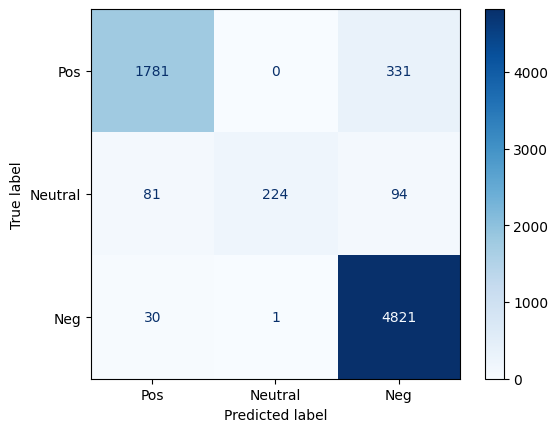

In [63]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pos', 'Neutral', 'Neg'])  # Modify display_labels as per your classes
disp.plot(cmap='Blues', values_format='d')


In [39]:
print(y_pred)
y_pred_series = pd.Series(y_pred)

# Use value_counts() on the pandas Series
print(y_pred_series.value_counts())

[ 1  1 -1 ...  1  1  1]
 1    4852
-1    2112
 0     399
Name: count, dtype: int64


In [40]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, accuracy_score

# # Step 1: Load your data
# # Assuming 'text' is your feature column and 'category' is your target column
# data = pd.DataFrame({
#     'text': [
#         "This is an example text for category 1",
#         "Another example text for category 2",
#         # Add your dataset...
#     ],
#     'category': [
#         "account-management.account-access",
#         "company-brand.competitor",
#         # Add corresponding categories...
#     ]
# })

# # Step 2: Split the data
# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['category'], test_size=0.2, random_state=42)

# # Step 3: Create a TF-IDF vectorizer and SVM pipeline
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('svm', OneVsRestClassifier(SVC(kernel='linear', probability=True)))
# ])

# # Step 4: Train the model
# pipeline.fit(X_train, y_train)

# # Step 5: Make predictions
# y_pred = pipeline.predict(X_test)

# # Step 6: Evaluate the model
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Optional: Hyperparameter tuning can be added here using GridSearchCV
